

<b>Objetivo:</b> Evaluar el deterioro cognitivo en las personas.



# **Deterioro Cognitivo**
El deterioro cognitivo se refiere a una disminución en las funciones cognitivas, que incluye problemas con la memoria, el razonamiento, la atención y el lenguaje. Puede ser un signo temprano de condiciones como la demencia o el Alzheimer.

## **Pruebas Cognitivas:**
- **WAIS (Wechsler Adult Intelligence Scale):** Es una prueba de inteligencia que evalúa diferentes aspectos del funcionamiento cognitivo, incluyendo:
  - **Directo:** Tareas que requieren respuestas inmediatas.
  - **Inverso:** Ejercicios que implican recordar información en orden inverso.
  - **Letras y Números:** Medida de la capacidad de atención y memoria de trabajo.
  - **Control Mental:** Evaluación de la capacidad para realizar tareas cognitivas bajo presión.

- **ACE-R (Addenbrooke's Cognitive Examination-Revised):** Es una herramienta de evaluación que mide diferentes dominios cognitivos, incluyendo atención, memoria, lenguaje y habilidades visuoespaciales. Se utiliza para detectar demencia y deterioro cognitivo leve.

- **BDI (Beck Depression Inventory):** Este inventario mide la severidad de los síntomas depresivos. La depresión puede influir en el rendimiento cognitivo, por lo que es importante evaluar su presencia.

- **STAI (State-Trait Anxiety Inventory):** Evalúa los niveles de ansiedad en dos aspectos: estado (situacional) y rasgo (duradero). La ansiedad puede afectar la cognición y el rendimiento en pruebas.

- **ALEXA (Directa e Indirecta):** Estas pruebas utilizan tecnología de reconocimiento de voz para evaluar la interacción verbal y la comprensión. La evaluación directa implica respuestas inmediatas, mientras que la indirecta puede incluir tareas más complejas.



## **WAIS (Wechsler Adult Intelligence Scale)**
La Wechsler Adult Intelligence Scale (WAIS) es una de las pruebas de inteligencia más utilizadas y reconocidas en la evaluación psicológica. Desarrollada por David Wechsler, la primera versión fue publicada en 1955, y desde entonces ha pasado por varias revisiones, siendo la más reciente la WAIS-IV, lanzada en 2008. Esta prueba se utiliza para evaluar el funcionamiento cognitivo en adultos y adolescentes a partir de los 16 años.

### **Estructura de la Prueba**
La WAIS-IV está compuesta por 15 subpruebas que se agrupan en cuatro índices principales:

1. **Índice de Comprensión Verbal (VCI):**
  - Evalúa la capacidad de entender, razonar y expresar información verbalmente.
  - Subpruebas:
    - Semejanzas
    - Vocabulario
    - Información

2. **Índice de Razonamiento Perceptivo (PRI):**
  - Mide la capacidad de interpretar y organizar información visual y espacial.
    - Subpruebas:
    - Diseño de Bloques
    - Matrices
    - Rompecabezas Visuales

3. **Índice de Memoria de Trabajo (WMI):**
  - Evalúa la capacidad de retener y manipular información en la memoria a corto plazo.
  - Subpruebas:
    - Dígitos
    - Letras y Números
    - Índice de Velocidad de Procesamiento (PSI):

4. **Índice de Velocidad de Procesamiento (PSI):**
  - Mide la rapidez y precisión en el procesamiento de información.
  - Subpruebas:
    - Claves
    - Búsqueda de Símbolos

### **Interpretación de Resultados**
Los resultados de la WAIS se presentan en forma de puntuaciones estándar, donde una puntuación de 100 es el promedio. Las puntuaciones en cada índice permiten identificar áreas de fortaleza y debilidad en el funcionamiento cognitivo del individuo.

### **Relación con el Deterioro Cognitivo**
La WAIS es particularmente útil en la evaluación del deterioro cognitivo, ya que puede ayudar a identificar cambios en el rendimiento cognitivo a lo largo del tiempo. Algunas consideraciones importantes son:

- Detección Temprana: Cambios sutiles en las puntuaciones de las subpruebas pueden indicar un deterioro cognitivo incipiente, lo que permite intervenciones tempranas.
- Diferenciación de Trastornos: La WAIS puede ayudar a diferenciar entre diferentes tipos de deterioro cognitivo, como el deterioro cognitivo leve (DCL) y la demencia, al observar qué áreas específicas están afectadas.
- Predicciones de Progresión: Las puntuaciones en la WAIS pueden correlacionarse con la progresión de trastornos neurocognitivos, permitiendo a los profesionales de la salud hacer predicciones sobre la evolución del deterioro cognitivo.

### **Consideraciones Demográficas**
Es importante tener en cuenta factores demográficos como la edad, el nivel educativo y el contexto cultural al interpretar los resultados de la WAIS. Estos factores pueden influir en el rendimiento y deben ser considerados para hacer una evaluación más precisa.

## **Bibliografía:**

- Wechsler, D. (2008). WAIS-IV: Wechsler Adult Intelligence Scale - Fourth Edition. Pearson.
- Hodges, J. R., & Carroll, J. (2007). Addenbrooke's Cognitive Examination (ACE) for the diagnosis of early dementia. Cognitive Neuropsychology, 24(1), 1-12.
- Beck, A. T., & Steer, R. A. (1993). Beck Depression Inventory. Psychological Corporation.
- Spielberger, C. D. (1983). State-Trait Anxiety Inventory. Consulting Psychologists Press.

<hr>
<center><b>PASO 1: RECOLECTAR LOS DATOS</b></center>

In [ ]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import re

In [ ]:
# Importamos el dataset
dataset = pd.read_excel('/content/BASE-PARTE 2-M2A.xlsx')

In [ ]:
# Realizamos una copia del dataframe para trabajar sobre esta
df = dataset.copy()

In [ ]:
# Creamos el correspondiente diccionario de datos y renombramos las columnas
def convertir_a_letra_excel(n):
    letra = ""
    while n >= 0:
        letra = chr(n % 26 + 65) + letra
        n = n // 26 - 1
    return letra

dic_datos = {}

for indice, columna in enumerate(df.columns.to_list()):
    clave = columna.replace('.', '').replace('-', '')
    clave = ''.join(i.capitalize() for i in clave.split())
    clave = re.sub(r'^\d+', '', clave)
    clave = convertir_a_letra_excel(indice) + '_' + clave[:8]
    dic_datos[clave] = columna

df.columns = dic_datos.keys()

In [ ]:
# Extraemos los nombres originales de las columnas para su investigación
nombre_archivo = '/content/dic_datos.txt'

with open(nombre_archivo, 'w') as archivo:
    for clave, valor in dic_datos.items():
        archivo.write(f'{clave} | {valor}\n')

print(f'Los valores han sido exportados a {nombre_archivo}.')

Los valores han sido exportados a /content/dic_datos.txt.


In [ ]:
# Obtenemos el nombre y descripción de la columna correspondiente
def obtener_info_columna(letra_excel):
    for clave in dic_datos.keys():
        if clave.startswith(letra_excel.upper()):
            descripcion =  dic_datos[clave]
            return clave, descripcion
    return None, None


In [ ]:
df.head()

,A_Estado,B_NombresY,C_CódigoDe,D_Edad,E_Profesio,F_Sexo,G_EstadoCi,H_Laterali,I_DéficitS,J_Enfermed,...,ML_Medicion,MM_TareasAl,MN_Medicion,MO_TiempoCo,MP_Medicion,MQ_TareasAl,MR_Medicion,MS_TiempoCo,MT_Medicion,MU_FirmaDeC
0,APTO-V1,Gomez Coello Saida Ruth,ECU-ISTA-E-056,66,ama de casa,Mujer,Casado/a,Diestro,Ninguno,NaN,...,NaN,8,200,15,NaN,4,NaN,NaN,NaN,NaN
1,APTO-V1,LOJANO VILLA ROGELIO JAIME,ECU-ISTA-E-058,78,agricultor,Hombre,Viudo/a,Diestro,Ninguno,NaN,...,NaN,8,200,13,NaN,4,NaN,NaN,NaN,NaN
2,APTO-V1,LOPEZ MORA NINFA PIEDAD,ECU-ISTA-E-090,73,ama de casa,Hombre,Viudo/a,Diestro,Ninguno,NaN,...,NaN,3,75,10,NaN,4,NaN,NaN,NaN,NaN
3,APTO-V1,HERRERA ESCANDON CLARA NOHEMI,ECU-ISTA-E-091,70,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,NaN,...,NaN,4,100,9,NaN,6,NaN,NaN,NaN,0.0
4,APTO-V1,MAITA MANUEL SALVADOR,ECU-ISTA-E-098,67,albanil,Hombre,Casado/a,Diestro,Ninguno,NaN,...,NaN,3,75,15,NaN,2,NaN,NaN,NaN,0.0


<hr>
<center><b>PASO 2: PRE PROCESAR LOS DATOS</b></center>

In [ ]:
# Obteneiendo el número de filas y columnas del dataframe
num_filas, num_columnas = df.shape
print(f'El dataframe tiene {num_columnas} columnas y {num_filas} filas.')

El dataframe tiene 359 columnas y 60 filas.


In [ ]:
# Observamos los tipos de datos de cada una de las columnas
df.dtypes

,0
A_Estado,object
B_NombresY,object
C_CódigoDe,object
D_Edad,int64
E_Profesio,object
...,...
MQ_TareasAl,int64
MR_Medicion,float64
MS_TiempoCo,float64
MT_Medicion,float64


In [ ]:
# Tranformamos columnas numerica de float a entero
for columna in df.select_dtypes(include=['float']).columns:
    df[columna] = df[columna].apply(lambda x: int(x) if pd.notna(x) and x.is_integer() else x)


In [ ]:
# Revisamos las columnas que contienen valores nulos:
def obtener_info_nulos(df):
    info_nulos = df.isnull().sum()
    info_nulos = info_nulos[info_nulos > 0].sort_values(ascending=False)
    print(info_nulos)


obtener_info_nulos(df)

LL_:0;2:8;3    60
MT_Medicion    60
MS_TiempoCo    60
MR_Medicion    60
MP_Medicion    60
ML_Medicion    60
MH_Medicion    60
LN_Unnamed:    60
J_Enfermed     57
K_Escribir     56
L_Escribir     48
M_Medicaci     36
N_Observac     26
MU_FirmaDeC    12
LV_Grupocog     5
LJ_Clasific     1
LI_Clasific     1
LD_CambiosE     1
LC_Irritabi     1
KM_Tristeza     1
JY_Ar28VeoQ     1
JW_Ar26MeSi     1
JI_AeEstoyD     1
IZ_aeEstoyC     1
LG_PérdidaD     1
dtype: int64


In [ ]:
# Eliminar columnas con mas del 20% de valores nulos:
for i in df.columns:
    porcentaje_nulos = round((df[i].isnull().sum()/num_filas) * 100, 2)
    if porcentaje_nulos > 20:
        print(f'\nColumna: {i}\nDescripción: {dic_datos[i]}\nContenido: {df[i].unique()}\nNulos: {porcentaje_nulos}%')
        df = df.drop(i, axis=1)


Columna: J_Enfermed
Descripción: 11.- Enfermedad psiquiátrica activa. Si presenta alguno de estos Ejemplos entonces escribirlo caso contrario colocar N/A (Ansiedad, Depresión,Trastorno de oposición desafiante, Trastorno de la conducta, Trastorno por estrés postraumático.  .  ) 
Contenido: [nan 'Insomnio ' 'Estres' 'Ansiedad']
Nulos: 95.0%

Columna: K_Escribir
Descripción: 12.- Escribir si presenta una Historia de Alcohol/Drogas caso contrario colocar N/A
Contenido: [nan 'Alcohol' 'Alcohol ']
Nulos: 93.33%

Columna: L_Escribir
Descripción: 13.- Escribir sí presenta  Condiciones medicas y/o neurológicas subyacentes (Toma medicina para dormir, toma medicina neurológico) caso contrario colocar N/A.
Contenido: [nan 'Para presión  para la diabetes' 'Dolor de cabeza y de rodilla '
 'Gripe-artritis-infeccion a las vias hurinarias-Anemia'
 'Diabetes-Colesterol alto' 'Tiroides' 'Diabetes' 'Medicación para dormir'
 'Pastillas para la presión alta ' 'Tiroides Y PRESIÓN ALTA'
 'Toma medicina para 

In [ ]:
obtener_info_nulos(df)

MU_FirmaDeC    12
LV_Grupocog     5
IZ_aeEstoyC     1
JI_AeEstoyD     1
JW_Ar26MeSi     1
JY_Ar28VeoQ     1
KM_Tristeza     1
LC_Irritabi     1
LD_CambiosE     1
LG_PérdidaD     1
LI_Clasific     1
LJ_Clasific     1
dtype: int64


In [ ]:
# Buscamos información de las columnas con valores nulos restantes
for i in ['mu', 'lv', 'iz', 'ji', 'jw', 'jy', 'km', 'lc', 'ld', 'lg', 'li', 'lj']:
    columna, descripcion = obtener_info_columna(i)
    print(f'\nColumna: {columna}\nDescripción: {descripcion}\nContenido: {df[columna].unique()}\nTipo: {df[columna].dtype}')




Columna: MU_FirmaDeC
Descripción: firma de consentimiento
Contenido: [nan  0.  1.]
Tipo: float64

Columna: LV_Grupocog
Descripción: GRUPO-COG(+68/1:no-demencia;-68/2:demencia)
Contenido: [ 1. nan  2.]
Tipo: float64

Columna: IZ_aeEstoyC
Descripción: 4.A-E Estoy contrariado.
Contenido: [ 1.  0.  2.  3. nan]
Tipo: float64

Columna: JI_AeEstoyD
Descripción: 13. A-E Estoy desasosegado.
Contenido: [ 1.  0. nan  3.  2.]
Tipo: float64

Columna: JW_Ar26MeSi
Descripción: A-R 26. Me siento descansado (-)
Contenido: [-2. -3. -1.  0. nan]
Tipo: float64

Columna: JY_Ar28VeoQ
Descripción: A-R 28. Veo que las dificultades se amontonan y no puedo con ellas.
Contenido: [ 1.  0.  2.  3. nan]
Tipo: float64

Columna: KM_Tristeza
Descripción: 1. TRISTEZA
Contenido: [ 0.  3.  1.  2. nan]
Tipo: float64

Columna: LC_Irritabi
Descripción: 17. IRRITABILIDAD
Contenido: [ 0.  1.  2.  3. nan]
Tipo: float64

Columna: LD_CambiosE
Descripción: 18. CAMBIOS EN EL APETITO
Contenido: [0 '2b' 1 '1a' '3a' 3 '1B' '1b' '1A'

In [ ]:
# Filtramos los nulos suponiendo que 0 es de quienes no dieron su consentimiento
df.MU_FirmaDeC = df.MU_FirmaDeC.fillna(0)

# Filtramos los nulos sabiendo que si el total ACE-R Sin Calculo supera 67 es 1(sin demencia) caso contrario 2(con demencia)
res_acer_sc = obtener_info_columna('lu')[0]
df.loc[df.LV_Grupocog.isnull(), 'LV_Grupocog'] = df.loc[df.LV_Grupocog.isnull(), res_acer_sc].apply(lambda x: 1 if x >= 68 else 2)

obtener_info_nulos(df)

IZ_aeEstoyC    1
JI_AeEstoyD    1
JW_Ar26MeSi    1
JY_Ar28VeoQ    1
KM_Tristeza    1
LC_Irritabi    1
LD_CambiosE    1
LG_PérdidaD    1
LI_Clasific    1
LJ_Clasific    1
dtype: int64


In [ ]:
def obtener_encabezados_rango(inicio, fin):
    letra_a_num = lambda letra: sum((ord(c) - 64) * 26 ** i for i, c in enumerate(reversed(letra.upper())))
    num_a_letra = lambda num: "" if num == 0 else num_a_letra((num - 1) // 26) + chr((num - 1) % 26 + 65)
    return [num_a_letra(i) for i in range(letra_a_num(inicio), letra_a_num(fin) + 1)]


obtener_encabezados_rango('a', 'd')

['A', 'B', 'C', 'D']

In [ ]:
# Obtenemos el valor correspondiente a columnas que dependen del calculo de otras columnas numericas.
def calcular_nulos(columna_objetivo, columna_total, columnas_sumar):
    if columna_objetivo in columnas_sumar:
        columnas_sumar.remove(columna_objetivo)

    columnas_sumar = [
        col for col in columnas_sumar
        if df[col].apply(pd.to_numeric, errors='coerce').notnull().any()
    ]

    nulos_idx = df[columna_objetivo].isnull()

    valores_calculados = (
        df.loc[nulos_idx, columna_total].astype(int) -
        df.loc[nulos_idx, columnas_sumar].apply(pd.to_numeric, errors='coerce').sum(axis=1)
    ).astype(int)

    df.loc[nulos_idx, columna_objetivo] = valores_calculados

In [ ]:
# Filtrando valores numeros por su correspondiente valor calculado.

# 4.A-E Estoy contrariado.
calcular_nulos('IZ_aeEstoyC', obtener_info_columna('jq')[0], [obtener_info_columna(i)[0] for i in obtener_encabezados_rango('iw', 'jp')])
# 13. A-E Estoy desasosegado.
calcular_nulos('JI_AeEstoyD', obtener_info_columna('jq')[0], [obtener_info_columna(i)[0] for i in obtener_encabezados_rango('iw', 'jp')])
# A-R 26. Me siento descansado (-)
calcular_nulos('JW_Ar26MeSi', obtener_info_columna('kl')[0], [obtener_info_columna(i)[0] for i in obtener_encabezados_rango('jr', 'kk')])
# A-R 28. Veo que las dificultades se amontonan y no puedo con ellas.
calcular_nulos('JY_Ar28VeoQ', obtener_info_columna('kl')[0], [obtener_info_columna(i)[0] for i in obtener_encabezados_rango('jr', 'kk')])
# 1. TRISTEZA
calcular_nulos('KM_Tristeza', obtener_info_columna('lh')[0], [obtener_info_columna(i)[0] for i in obtener_encabezados_rango('km', 'lg')])
# 17. IRRITABILIDAD
calcular_nulos('LC_Irritabi', obtener_info_columna('lh')[0], [obtener_info_columna(i)[0] for i in obtener_encabezados_rango('km', 'lg')])
# 18. CAMBIOS EN EL APETITO
calcular_nulos('LD_CambiosE', obtener_info_columna('lh')[0], [obtener_info_columna(i)[0] for i in obtener_encabezados_rango('km', 'lg')])
# 21. PÉRDIDA DE INTERES EN EL SEXO
calcular_nulos('LG_PérdidaD', obtener_info_columna('lh')[0], [obtener_info_columna(i)[0] for i in obtener_encabezados_rango('km', 'lg')])

# Filtrando valores nulos utilizando la moda

# CLASIFICACION ITEMS POR BDI
df.LI_Clasific = df.LI_Clasific.fillna(df.LI_Clasific.mode()[0])
# CLASIFICACION ITEMS POR BDI 1=0-13;2=14-19;3=20o+
df.LJ_Clasific = df.LJ_Clasific.fillna(df.LI_Clasific.mode()[0])

obtener_info_nulos(df)

Series([], dtype: int64)


In [ ]:
# Exporetar la data
dic_datos_df = pd.DataFrame(list(dic_datos.items()), columns=['Nombre', 'Descripción'])

with pd.ExcelWriter('/content/datosLimpios.xlsx') as writer:
    df.to_excel(writer, sheet_name='datosLimpios', index=False)
    dic_datos_df.to_excel(writer, sheet_name='dicDatos', index=False)

print("Datos exportados exitosamente a 'datos_exportados.xlsx'")

Datos exportados exitosamente a 'datos_exportados.xlsx'


In [ ]:
df.to_csv('/content/datosLimpios.csv', index=False)

print("Datos exportados exitosamente a 'datos_exportados.csv'")

Datos exportados exitosamente a 'datos_exportados.csv'


<hr>
<center><b>PASO 3: EXPLORAR LOS DATOS</b></center>

In [ ]:
df.describe()

,D_Edad,P_Ct1,Q_Ct2,R_Ct3,S_Ct4,T_Ct5,U_Ct6,V_Ct7,W_Ct8,X_TotalPre,...,MF_Medicion,MG_TiempoCo,MI_TareasAl,MJ_Medicion,MK_TiempoCo,MM_TareasAl,MN_Medicion,MO_TiempoCo,MQ_TareasAl,MU_FirmaDeC
count,60.000000,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,73.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,27.083333,3.188333,1.566667,19.583333,2.983333,4.966667,124.166667,4.950000,4.766667,0.650000
std,6.368953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.077220,2.966370,0.997738,12.471719,1.970044,2.154748,53.868694,3.793058,2.294922,0.480995
min,60.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,25.000000,2.000000,0.000000,0.000000,2.000000,3.000000,75.000000,2.000000,3.000000,0.000000
50%,74.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,25.000000,2.000000,2.000000,25.000000,2.500000,4.000000,100.000000,4.000000,4.000000,1.000000
75%,78.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,37.500000,4.000000,2.000000,25.000000,4.000000,7.000000,175.000000,7.250000,6.000000,1.000000
max,87.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,50.000000,20.000000,3.000000,37.500000,9.000000,8.000000,200.000000,15.000000,8.000000,1.000000


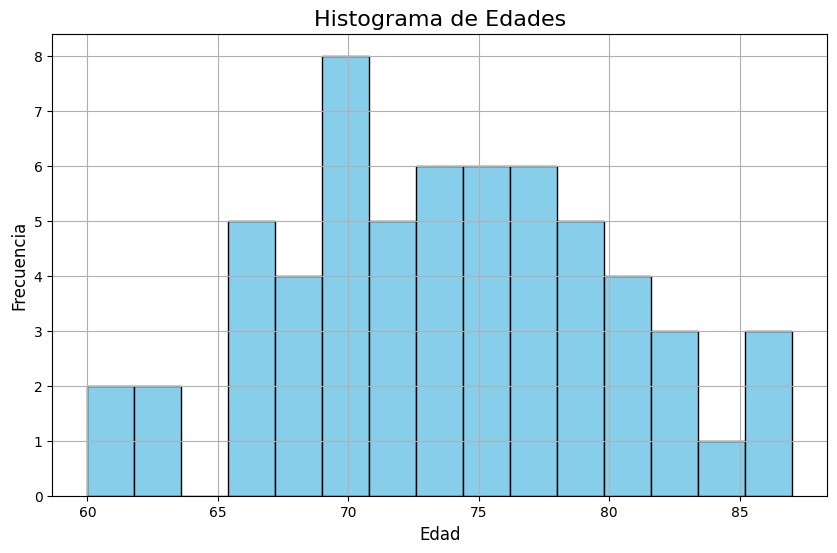

In [ ]:
# Frecuencia de edades de las personas que participaron en el estudio
plt.figure(figsize=(10,6))
plt.hist(df['D_Edad'], bins=15, edgecolor='black', color='skyblue')
plt.title('Histograma de Edades', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

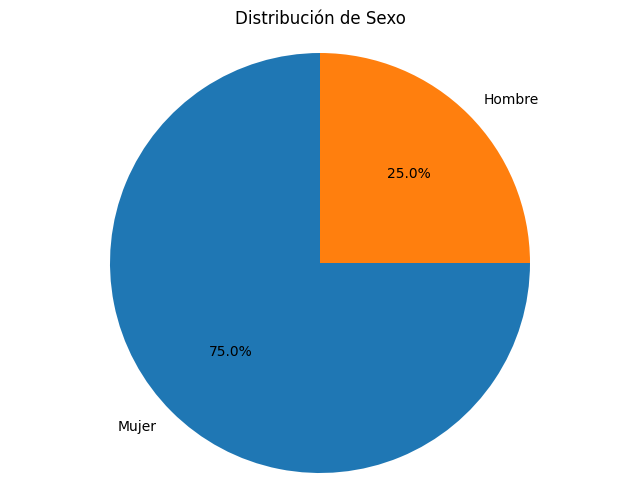

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(df['F_Sexo'].value_counts(), labels=df['F_Sexo'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Sexo')
plt.axis('equal')
plt.show()

<hr>
<center><b>PASO 4: ENTRENAR EL ALGORITMO</b></center>

In [ ]:
# Codificar variables categóricas
label_encoder = LabelEncoder()

df['F_Sexo_Enc'] = label_encoder.fit_transform(df['F_Sexo'])  # 'Mujer' -> 1, 'Hombre' -> 0
df['O_AñosDeEs_Enc'] = label_encoder.fit_transform(df['O_AñosDeEs']) # 0 → 'Basicos (4 a 6 años)' 1 → 'Medios(9-12 años)' 2 → 'Ninguno' 3 → 'Primarios(8 años)'

In [ ]:
# Seleccionar variables independientes y dependientes
X = df[['D_Edad', 'F_Sexo_Enc', 'O_AñosDeEs_Enc', 'X_TotalPre', 'AC_TotalPre',
           'AL_TotalPre', 'AO_TotalPre', 'AX_TotalCas', 'IV_TotalAce', 'LH_TotalBdi']]
y = df['HG_TotalWai']

for i in X.columns:
    if i not in ['O_AñosDeEs_Enc', 'F_Sexo_Enc']:
        X.loc[:, i] = X[i].astype(int)  # Usar .loc para evitar la advertencia
        print(f'{i}: {dic_datos[i]}')

print(f'\nHG_TotalWai: {dic_datos["HG_TotalWai"]}')



D_Edad: EDAD
X_TotalPre: TOTAL PREGUNTAS BASICAS TAREA 1
AC_TotalPre: TOTAL PREGUNTAS MUSICA  TAREA 2
AL_TotalPre: TOTAL PREGUNTAS MEMORIA  TAREA 3
AO_TotalPre: TOTAL PREGUNTAS PHONE TAREA 4
AX_TotalCas: TOTAL CASA INTELIGENTE TAREA 5
IV_TotalAce: TOTAL ACE-R
LH_TotalBdi: TOTAL BDI

HG_TotalWai: TOTAL WAIS


In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

<hr>
<center><b>PASO 5: EVALUAR EL ALGORITMO</b></center>

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Mostrar resultados
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 251.66666666666666
R^2 Score: -1.3917634635691658


<hr>
<center><b>PASO 6: UTILIZAR EL MODELO</b></center>